In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load dataframes
dip_df = pd.read_csv("dip-har-eff.csv")

# Gather info
dip_rows = dip_df.shape[0]
dip_cols = dip_df.shape[1]

dip_df = dip_df.values
dip_df = dip_df[np.arange(0, dip_rows), :]

dip_X = dip_df[:,1]
dip_Y = dip_df[:,2]
dip_X_max = np.max(dip_X)
dip_Y_max = np.max(dip_Y)

dip_X = np.true_divide(dip_X, dip_X_max)
dip_Y = np.true_divide(dip_Y, dip_Y_max)

# Config pyplot
# plt.xlim(0, max(dip_X))
# plt.ylim(0, max(dip_Y))

In [55]:
def calc_total_Error(row, col):
    return (b1*row+b0 - col)**2

def calc_b0_Error(row, col):
    return (b1*row+b0 - col)

def calc_b1_Error(row, col):
    return (b1*row+b0 - col) * row


# helper wrapper function for us to plug in error function to use
def useErrorFunction(errorFunction, args):
    return errorFunction(*args)
    
def mse(X,Y, errorFunction):
    errorsList = []
    for (row, col) in zip(X,Y):
        val = useErrorFunction(errorFunction, (row, col))
        errorsList.append(val)  
    ERROR_SUM = sum(errorsList)
    return ERROR_SUM / batchSize

def adjustWeight(weight, learn, temp_error):
    return weight - learn * temp_error

def takeRandomBatch(listLen, batchSize):
    return random.sample(range(listLen), batchSize)

def calcMean(results):
    results_sum = sum(results)
    return results_sum / batchSize

# Related to R Squared Error Loss
def calc_predicted(b0, b1, data):
    predicted_vals = map(lambda x: b1*x + b0, data)
    return predicted_vals

def calcSquareDiff(data):
    mean = calcMean(data)
    mean_diff = map(lambda actual: actual - mean, data)
    square_mean_diff = sum(map(lambda val: val**2, mean_diff))
    return square_mean_diff

def calcRSquared(actual, predicted):
    predicted_R_square = calcSquareDiff(predicted)
    actual_R_square = calcSquareDiff(actual)
    print(predicted_R_square)
    print(actual_R_square)
    return predicted_R_square / actual_R_square


# Gradient Descent Optimization : *Batch Size=10*

 b0: -0.34598964938 b1: 1.09212729308 Error: 0.337417295794
 b0: -0.276341564702 b1: 1.12978091591 Error: 0.096885150109
 b0: -0.243854255842 b1: 1.14351483927 Error: 0.0424629825836
 b0: -0.22775454976 b1: 1.14677434489 Error: 0.0283852223696
 b0: -0.218899918972 b1: 1.14547550173 Error: 0.0240037367653
 b0: -0.213266288395 b1: 1.14222092336 Error: 0.0223270196622
 b0: -0.209082134362 b1: 1.13815504772 Error: 0.0215397373925
 b0: -0.205567252191 b1: 1.13378061257 Error: 0.0210886738933
 b0: -0.20237770995 b1: 1.12931797153 Error: 0.0207784472069
 b0: -0.199361582241 b1: 1.12486322238 Error: 0.0205325119032
 b0: -0.196451452779 b1: 1.12045779624 Error: 0.0203189803997
 b0: -0.193617106485 b1: 1.11611908223 Error: 0.0201240741512
 b0: -0.190844709931 b1: 1.11185390454 Error: 0.0199416602594
 b0: -0.188127648833 b1: 1.10766445316 Error: 0.0197689000722
 b0: -0.185462495618 b1: 1.10355089366 Error: 0.0196043905186
 b0: -0.182847234636 b1: 1.09951251536 Error: 0.0194473600723
 b0: -0.18028

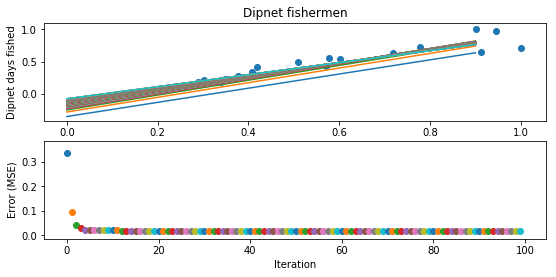

R-Squared
0
0.587460539868
0.0


In [57]:
%matplotlib inline
import matplotlib.pyplot as plt
import random

# init weights
b1 = 1.0
b0 = -0.5
batchSize = 10
epochs = 100

learn = 0.4

plt.figure(figsize=(9,4))

# Get current size
fig_size = plt.rcParams["figure.figsize"]
plt.rcParams["figure.figsize"] = [9.5,6]

plt.subplot(211)

plt.xlabel('Dipnet days fished')
plt.ylabel('Dipnet days fished')
plt.title('Dipnet fishermen')
plt.scatter(dip_X, dip_Y)
plt.pause(0.1);

batchSample = takeRandomBatch(len(dip_X), batchSize)
sample_X = [dip_X[i] for i in sorted(batchSample)]
sample_Y = [dip_Y[i] for i in sorted(batchSample)]


batch_epoch_ERRORS = []
for i in range(epochs):
    ERROR = mse(dip_X, dip_Y, calc_total_Error)
    batch_epoch_ERRORS.append(ERROR)
    b0_temp_error = mse(sample_X, sample_Y, calc_b0_Error)
    b1_temp_error = mse(sample_X, sample_Y, calc_b1_Error)
    b0 = adjustWeight(b0, learn, b0_temp_error)
    b1 = adjustWeight(b1, learn, b1_temp_error)
    print(" b0: " + str(b0) + " b1: " + str(b1) + " Error: " + str(ERROR))
    # How to plot the graph
    X_test = np.arange(0,1,0.1)
    plt.plot (X_test, b1*X_test + b0)
    plt.pause(0.1)
    
plt.subplot(212)
plt.xlabel('Iteration')
plt.ylabel('Error (MSE)')

predicted = calc_predicted(b0,b1,sample_X)
print('R-Squared: ')
print(calcRSquared(sample_Y, predicted))
    
for count, value in enumerate(batch_epoch_ERRORS):
    plt.scatter(count,value)

plt.subplots_adjust(bottom=1.00, top=1.75)
plt.show()